<a href="https://colab.research.google.com/github/TummalaSharmila/HT/blob/assignment-1/HT_A_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Assigning th paths of data files to variables to load the data
matrix1_path = "matrix1.txt"
matrix2_path = "matrix2.txt"

In [14]:
# Reading the data into dataframes
matrix1_data = pd.read_csv(matrix1_path, sep='\t', index_col=0)
matrix2_data = pd.read_csv(matrix2_path, sep='\t', index_col=0)

In [15]:
# removing the columns which does not contain cancer data
matrix1_data = matrix1_data.iloc[:, :-1]
matrix2_data = matrix2_data.iloc[:, :-1]

In [16]:
# Calculating the correlation matrices
correlation_matrix1 = matrix1_data.corr()
correlation_matrix2 = matrix2_data.corr()

In [17]:
#saving the matrices into a csv file
correlation_matrix1.to_csv("correlation_matrix1.csv")
correlation_matrix2.to_csv("correlation_matrix2.csv")

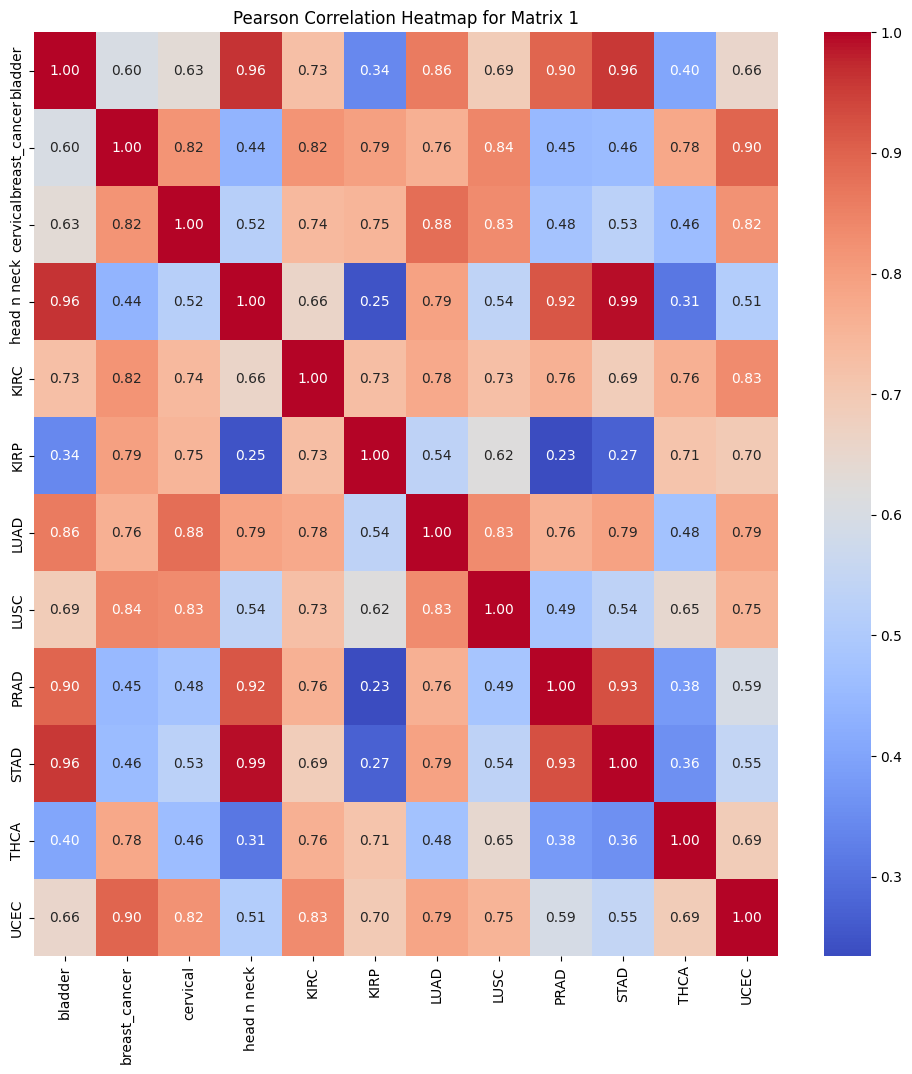

In [21]:
# Visualization: Heatmaps for pearson correlation of matrix1
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Heatmap for Matrix 1')
plt.show()


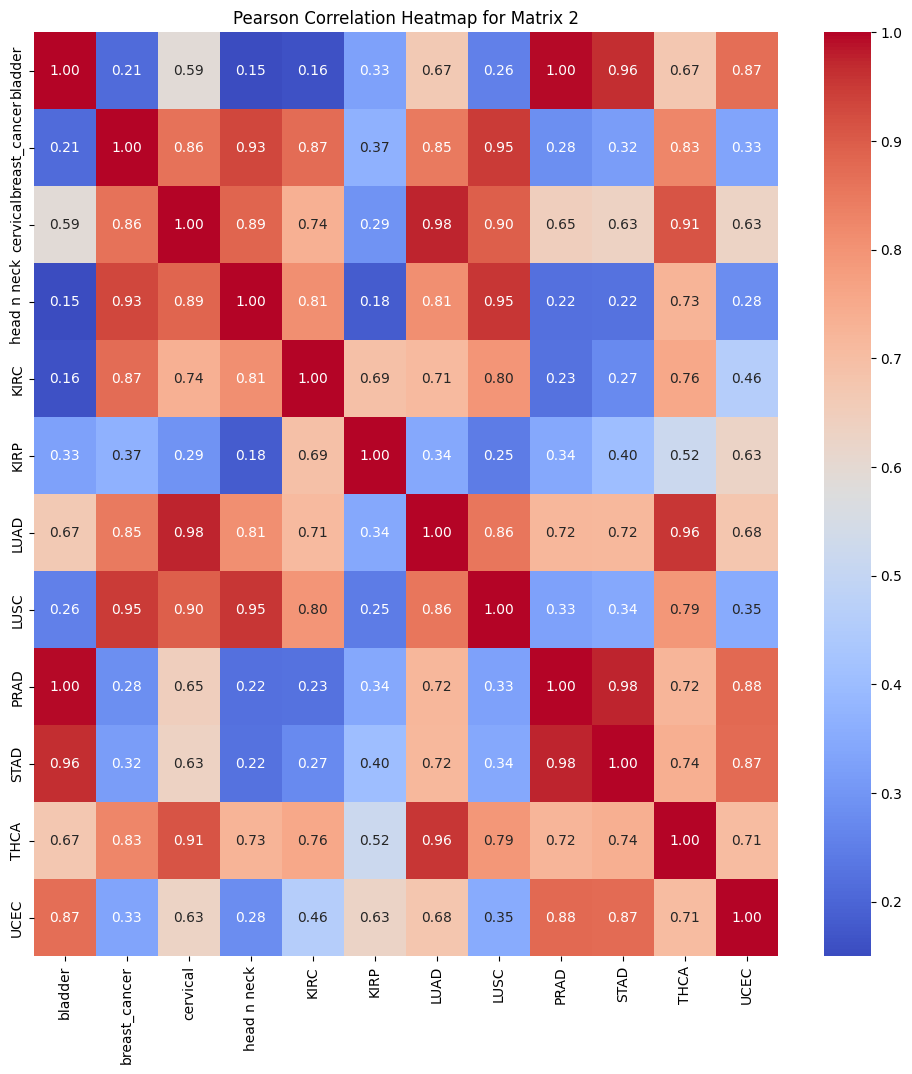

In [22]:
## Visualization: Heatmaps for pearson correlation of matrix2
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Heatmap for Matrix 2')
plt.show()


In [23]:
# Correlation between each cancer type across the two matrices
correlation_between_matrices = {}
for column in matrix1_data.columns:
    correlation = matrix1_data[column].corr(matrix2_data[column], method='pearson')
    correlation_between_matrices[column] = correlation

In [24]:
# Converting cancer-specific correlations to DataFrame
df_cancer_specific_correlations = pd.DataFrame(list(correlation_between_matrices.items()), columns=['Cancer Type', 'Correlation'])

# Calculating the overall correlation between the two original data matrices
overall_correlation = np.corrcoef(matrix1_data.values.flatten(), matrix2_data.values.flatten())[0, 1]

# Appending the overall correlation to the DataFrame
overall_correlation_row = pd.DataFrame([['Overall', overall_correlation]], columns=['Cancer Type', 'Correlation'])
df_cancer_specific_correlations = pd.concat([df_cancer_specific_correlations, overall_correlation_row], ignore_index=True)

# Saving combined cancer-specific and overall correlations into csv file
df_cancer_specific_correlations.to_csv('overall_correlations_data.csv', index=False)